In [1]:
import torch
import numpy as np
import pandas as pd
from preprocess.PreProcess import TA_PreProcess
from models import JPAN_BERT
from trainer import JPAN_BERT_trainer
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_name = 'TA' # or 'ASAP'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
seed = 5
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic = True

In [3]:
ta = TA_PreProcess(bert=True)
w2v_model, train_set, dev_set, test_set = ta.get_dataset_bert()

N_vocab: 14356 | D_embed: 200 | N_aspects: 20


Some weights of the model checkpoint at ./model_params/bert were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


We have added 6625 tokens


### Train

In [4]:
model = JPAN_BERT(w2v_model.E, w2v_model.T).to(device)
model

JPAN_BERT(
  (E): Embedding(14356, 200)
  (T): Embedding(20, 200)
  (attention): attention(
    (M): Linear(in_features=200, out_features=200, bias=True)
  )
  (linear): Linear(in_features=200, out_features=20, bias=True)
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(37147, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)


In [4]:
epochs = 20
batch_size = 64
negsize = 20

trainer = JPAN_BERT_trainer()

Preparing...


EPOCH: 1 | LOSS INFO: TOTAL:13.85444, AB: 1288.02490, SC: 0.97419 | TRAIN-F1: 0.42075: 100%|█| 367/367 [06:59<00:00,  1
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.65it/s]


VAL-F1: 0.47280 | VAL-LOSS-AB: 1323.38187 | VAL-LOSS-S: 0.84790
Coherence Score(10->50): [-132.4407501220703, -573.0411376953125, -1320.4698486328125, -2372.61376953125, -3713.713623046875]


EPOCH: 2 | LOSS INFO: TOTAL:13.40971, AB: 1266.90967, SC: 0.74061 | TRAIN-F1: 0.51612: 100%|█| 367/367 [06:55<00:00,  1
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.66it/s]


VAL-F1: 0.58851 | VAL-LOSS-AB: 1288.23803 | VAL-LOSS-S: 0.71724
Coherence Score(10->50): [-133.00222778320312, -576.5806884765625, -1323.6126708984375, -2377.740478515625, -3716.71435546875]


EPOCH: 3 | LOSS INFO: TOTAL:13.17419, AB: 1241.37256, SC: 0.76046 | TRAIN-F1: 0.61071: 100%|█| 367/367 [06:55<00:00,  1
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.65it/s]


VAL-F1: 0.61118 | VAL-LOSS-AB: 1242.18448 | VAL-LOSS-S: 0.67568
Coherence Score(10->50): [-134.40725708007812, -577.2474365234375, -1332.098876953125, -2385.90771484375, -3724.483154296875]


EPOCH: 4 | LOSS INFO: TOTAL:12.76357, AB: 1217.02380, SC: 0.59334 | TRAIN-F1: 0.58697: 100%|█| 367/367 [06:55<00:00,  1
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.67it/s]


VAL-F1: 0.63440 | VAL-LOSS-AB: 1195.04181 | VAL-LOSS-S: 0.65572
Coherence Score(10->50): [-135.86514282226562, -575.8590698242188, -1327.291015625, -2384.10693359375, -3719.660888671875]


EPOCH: 5 | LOSS INFO: TOTAL:11.74559, AB: 1115.12256, SC: 0.59437 | TRAIN-F1: 0.59620: 100%|█| 367/367 [06:54<00:00,  1
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.65it/s]


VAL-F1: 0.66089 | VAL-LOSS-AB: 1149.15389 | VAL-LOSS-S: 0.64100
Coherence Score(10->50): [-137.77774047851562, -582.8965454101562, -1338.0765380859375, -2397.22998046875, -3736.25927734375]


EPOCH: 6 | LOSS INFO: TOTAL:11.84088, AB: 1133.12317, SC: 0.50965 | TRAIN-F1: 0.79205: 100%|█| 367/367 [06:53<00:00,  1
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.65it/s]


VAL-F1: 0.66938 | VAL-LOSS-AB: 1145.60627 | VAL-LOSS-S: 0.64731
Coherence Score(10->50): [-137.1831512451172, -583.1473999023438, -1338.583740234375, -2397.32421875, -3736.76025390625]


EPOCH: 7 | LOSS INFO: TOTAL:12.00549, AB: 1129.72827, SC: 0.70820 | TRAIN-F1: 0.59236: 100%|█| 367/367 [06:54<00:00,  1
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.66it/s]


VAL-F1: 0.67306 | VAL-LOSS-AB: 1140.05286 | VAL-LOSS-S: 0.64587
Coherence Score(10->50): [-137.7084197998047, -582.6812744140625, -1338.5703125, -2397.281005859375, -3736.721923828125]


EPOCH: 8 | LOSS INFO: TOTAL:11.84375, AB: 1110.90710, SC: 0.73468 | TRAIN-F1: 0.55998: 100%|█| 367/367 [06:55<00:00,  1
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.64it/s]


VAL-F1: 0.66777 | VAL-LOSS-AB: 1134.67053 | VAL-LOSS-S: 0.64768
Coherence Score(10->50): [-140.56614685058594, -589.9346923828125, -1348.5845947265625, -2410.3046875, -3753.253173828125]


EPOCH: 9 | LOSS INFO: TOTAL:11.79155, AB: 1118.37170, SC: 0.60784 | TRAIN-F1: 0.70000: 100%|█| 367/367 [06:55<00:00,  1
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.64it/s]


VAL-F1: 0.66228 | VAL-LOSS-AB: 1128.17238 | VAL-LOSS-S: 0.65155
Coherence Score(10->50): [-141.31610107421875, -590.3499755859375, -1346.0882568359375, -2411.06640625, -3754.65380859375]


EPOCH: 10 | LOSS INFO: TOTAL:11.57331, AB: 1114.21997, SC: 0.43111 | TRAIN-F1: 0.79698: 100%|█| 367/367 [06:54<00:00,  
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.66it/s]


VAL-F1: 0.66956 | VAL-LOSS-AB: 1122.46622 | VAL-LOSS-S: 0.64604
Coherence Score(10->50): [-139.81716918945312, -588.1810913085938, -1341.5638427734375, -2406.37939453125, -3745.839111328125]


EPOCH: 11 | LOSS INFO: TOTAL:11.68963, AB: 1077.82703, SC: 0.91136 | TRAIN-F1: 0.56721: 100%|█| 367/367 [06:55<00:00,  
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.66it/s]


VAL-F1: 0.66483 | VAL-LOSS-AB: 1123.38535 | VAL-LOSS-S: 0.65059
Coherence Score(10->50): [-139.7814178466797, -587.9557495117188, -1341.53076171875, -2406.35546875, -3745.61669921875]


EPOCH: 12 | LOSS INFO: TOTAL:11.24854, AB: 1085.30261, SC: 0.39552 | TRAIN-F1: 0.80190: 100%|█| 367/367 [06:56<00:00,  
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.66it/s]


VAL-F1: 0.66808 | VAL-LOSS-AB: 1120.48679 | VAL-LOSS-S: 0.65291
Coherence Score(10->50): [-139.57931518554688, -586.8512573242188, -1340.6160888671875, -2405.186767578125, -3744.060546875]


EPOCH: 13 | LOSS INFO: TOTAL:11.45910, AB: 1092.39722, SC: 0.53513 | TRAIN-F1: 0.68528: 100%|█| 367/367 [06:55<00:00,  
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.65it/s]


VAL-F1: 0.66896 | VAL-LOSS-AB: 1119.56306 | VAL-LOSS-S: 0.64852
Coherence Score(10->50): [-139.74118041992188, -587.8839721679688, -1340.583251953125, -2405.087646484375, -3744.137451171875]


EPOCH: 14 | LOSS INFO: TOTAL:11.63217, AB: 1099.03613, SC: 0.64181 | TRAIN-F1: 0.62401: 100%|█| 367/367 [06:54<00:00,  
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.64it/s]


VAL-F1: 0.66964 | VAL-LOSS-AB: 1120.34103 | VAL-LOSS-S: 0.64538
Coherence Score(10->50): [-139.67874145507812, -586.5853271484375, -1340.945068359375, -2405.425537109375, -3744.48974609375]


EPOCH: 15 | LOSS INFO: TOTAL:12.18128, AB: 1150.96411, SC: 0.67164 | TRAIN-F1: 0.71928: 100%|█| 367/367 [06:53<00:00,  
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.65it/s]


VAL-F1: 0.67285 | VAL-LOSS-AB: 1119.55109 | VAL-LOSS-S: 0.64877
Coherence Score(10->50): [-139.6160888671875, -586.6295166015625, -1341.0074462890625, -2405.45068359375, -3744.514892578125]


EPOCH: 16 | LOSS INFO: TOTAL:11.99798, AB: 1133.09692, SC: 0.66701 | TRAIN-F1: 0.69377: 100%|█| 367/367 [06:54<00:00,  
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.65it/s]


VAL-F1: 0.67231 | VAL-LOSS-AB: 1118.92266 | VAL-LOSS-S: 0.65289
Coherence Score(10->50): [-139.4536590576172, -586.4671020507812, -1341.0728759765625, -2405.516357421875, -3744.58056640625]


EPOCH: 17 | LOSS INFO: TOTAL:11.95713, AB: 1119.03540, SC: 0.76678 | TRAIN-F1: 0.65399: 100%|█| 367/367 [06:54<00:00,  
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.66it/s]


VAL-F1: 0.67587 | VAL-LOSS-AB: 1117.99674 | VAL-LOSS-S: 0.65039
Coherence Score(10->50): [-139.484619140625, -586.4777221679688, -1341.0836181640625, -2405.52685546875, -3744.59130859375]


EPOCH: 18 | LOSS INFO: TOTAL:11.74612, AB: 1109.36389, SC: 0.65248 | TRAIN-F1: 0.74563: 100%|█| 367/367 [06:55<00:00,  
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.65it/s]


VAL-F1: 0.67347 | VAL-LOSS-AB: 1117.45704 | VAL-LOSS-S: 0.65445
Coherence Score(10->50): [-139.484619140625, -586.4718627929688, -1340.9415283203125, -2405.384765625, -3744.44921875]


EPOCH: 19 | LOSS INFO: TOTAL:11.67986, AB: 1122.69458, SC: 0.45291 | TRAIN-F1: 0.81940: 100%|█| 367/367 [06:53<00:00,  
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.64it/s]


VAL-F1: 0.67402 | VAL-LOSS-AB: 1117.62180 | VAL-LOSS-S: 0.65001
Coherence Score(10->50): [-139.5181884765625, -586.708984375, -1341.115966796875, -2405.559326171875, -3744.62353515625]


EPOCH: 20 | LOSS INFO: TOTAL:11.31946, AB: 1065.09167, SC: 0.66854 | TRAIN-F1: 0.69049: 100%|█| 367/367 [06:55<00:00,  
validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.63it/s]


VAL-F1: 0.67406 | VAL-LOSS-AB: 1118.64260 | VAL-LOSS-S: 0.65240
Coherence Score(10->50): [-139.50137329101562, -586.6921997070312, -1341.0992431640625, -2405.40478515625, -3744.46923828125]


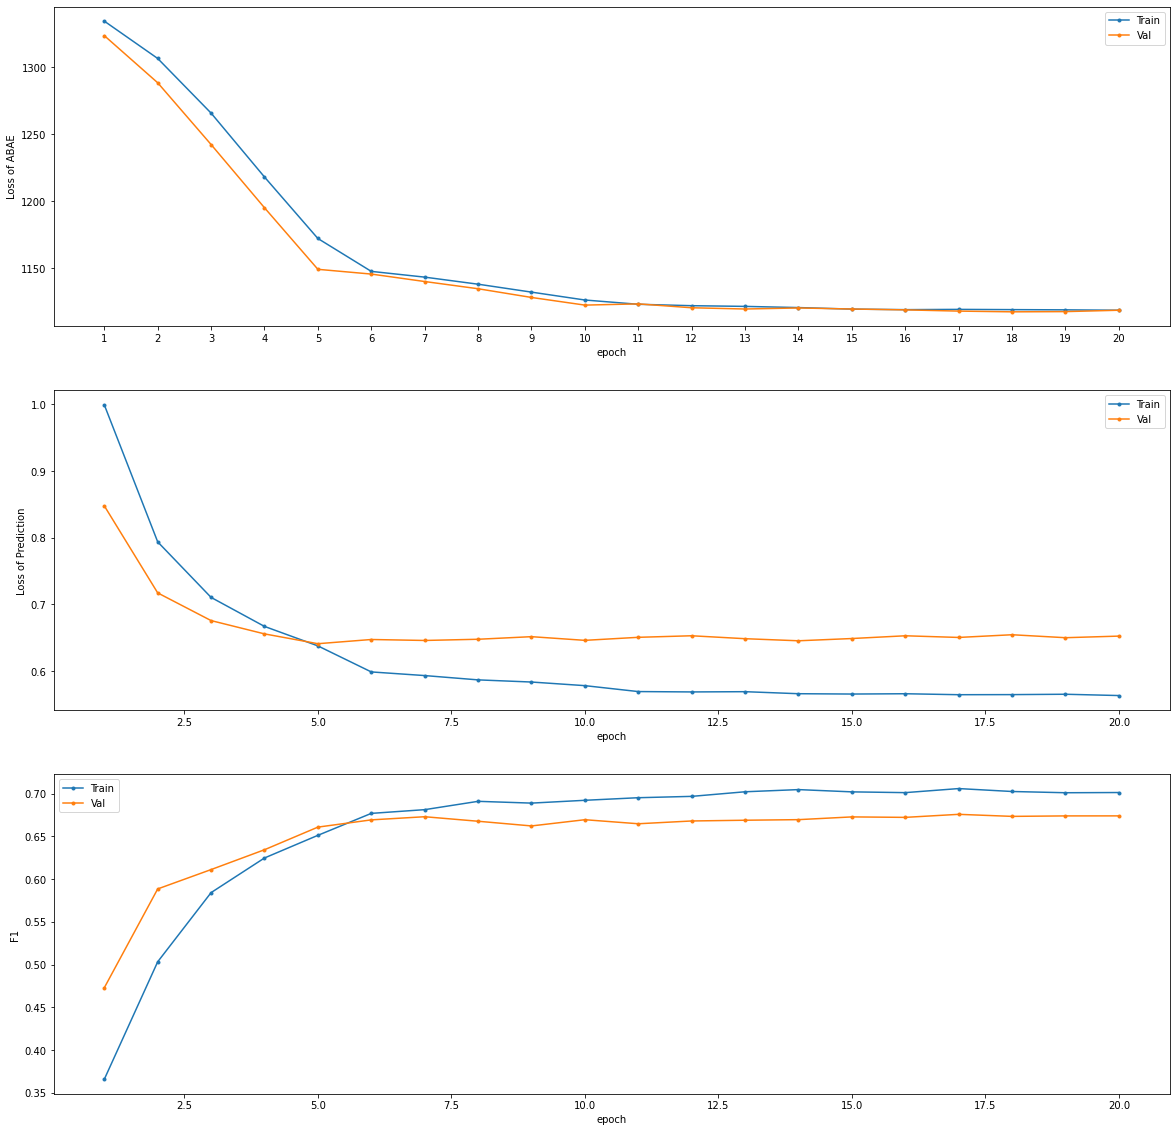

In [6]:
trainer.train(model, w2v_model, train_set, dev_set, device=device, epochs=epochs, batch_size=batch_size, negsize=negsize, 
              ortho_reg=0.1, data_name=data_name, model_name='JPAN_BERT_' + str(seed))

### Test

In [5]:
model = JPAN_BERT(w2v_model.E, w2v_model.T).to(device)
model.load_state_dict(torch.load("./model_params/" + data_name + "_JPAN_BERT_"+ str(seed) +"_17.model", map_location=device))
model.eval()

JPAN_BERT(
  (E): Embedding(14356, 200)
  (T): Embedding(20, 200)
  (attention): attention(
    (M): Linear(in_features=200, out_features=200, bias=True)
  )
  (linear): Linear(in_features=200, out_features=20, bias=True)
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(37147, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)


review-level sentiment classification

In [6]:
trainer.test_review_level_SC(model, test_set, batch_size, device)

Precision: 0.6838882143570958
Recall: 0.6819900091691773
F1-score: 0.6815173942374756
Accuracy: 0.7284722222222222


aspect identification

In [ ]:
trainer.test_ACD(model, test_set, batch_size, device)

Th: 0.01000 | P: 0.86473 | R: 1.00000 | F1: 0.927459899
Th: 0.01184 | P: 0.86473 | R: 1.00000 | F1: 0.927459899
Th: 0.01367 | P: 0.86473 | R: 1.00000 | F1: 0.927459899
Th: 0.01551 | P: 0.86473 | R: 1.00000 | F1: 0.927459899
Th: 0.01735 | P: 0.86473 | R: 1.00000 | F1: 0.927459899
Th: 0.01918 | P: 0.86473 | R: 1.00000 | F1: 0.927459899
Th: 0.02102 | P: 0.86473 | R: 1.00000 | F1: 0.927459899
Th: 0.02286 | P: 0.86473 | R: 1.00000 | F1: 0.927459899
Th: 0.02469 | P: 0.86473 | R: 1.00000 | F1: 0.927459899
Th: 0.02653 | P: 0.86473 | R: 1.00000 | F1: 0.927459899
Th: 0.02837 | P: 0.86473 | R: 1.00000 | F1: 0.927459899
Th: 0.03020 | P: 0.86473 | R: 1.00000 | F1: 0.927459899
Th: 0.03204 | P: 0.86473 | R: 1.00000 | F1: 0.927459899
Th: 0.03388 | P: 0.86473 | R: 1.00000 | F1: 0.927459899
Th: 0.03571 | P: 0.86473 | R: 1.00000 | F1: 0.927459899
Th: 0.03755 | P: 0.86473 | R: 1.00000 | F1: 0.927459899


ACSA

In [10]:
trainer.test_ACSA(model, test_set, batch_size, device, best_th=0.01918)

ACSA: P: 0.43442 | R: 0.50238 | F1: 0.46594
SC: Accuracy: 0.502380542648999
      p=-2  p=-1   p=0   p=1
t=-2     0     0     0     0
t=-1     0  3578   861   889
t=0      0  1752   862  1657
t=1      0  2048  1468  4318
